<a href="https://colab.research.google.com/github/KonstantinElfimow/pandas_hypothesis_p_value/blob/main/hypothesis_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [39]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

## Проверка гипотезы.
## H0: удовлетворённость = 80%
## H1: удовлетворённость < 80%

Менеджер Виноградного Дня утверждает, что 80% клиентов удовлетворены напитком. Мы опросили 100 человек. 75 довольны. Какой вывод мы можем сделать?

Допустим, что удовлетворённость равна 80%. Какова при этом вер. получить удовлетворённость 75% и ниже при выборке в 100 человек?

*p*-*value*

In [34]:
np.mean([np.random.binomial(1, 0.8, size=100).mean() <= 0.75 for _ in range(10000)])

0.1287

In [36]:
from statsmodels.stats.proportion import proportions_ztest

In [37]:
proportions_ztest(75, 100, value=0.8, alternative='smaller')

(-1.1547005383792526, 0.12410653949496159)

In [40]:
import seaborn as sns

<Axes: ylabel='Count'>

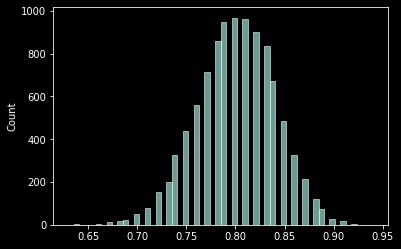

In [42]:
sns.histplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(10000)])
# p-value можно воспринимать как площадь

<Axes: ylabel='Density'>

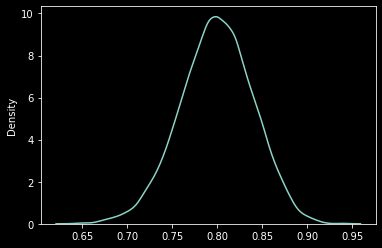

In [43]:
sns.kdeplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(10000)])

Конверсия на текущем лендинге состовляет 10%. Покажем новый лендинг только 30% клиентов.

In [46]:
df = pd.DataFrame({'group': ['old_landing (A)', 'new_landing (B)'], 'lead': [700, 300], 'sale': [70, 48]})

In [47]:
df

,group,lead,sale
0,old_landing (A),700,70
1,new_landing (B),300,48


In [48]:
df['cr'] = df['sale'] / df['lead']

In [49]:
df

,group,lead,sale,cr
0,old_landing (A),700,70,0.10
1,new_landing (B),300,48,0.16


H0: Допустим, что никакой разницы нет. Какова вероятность получить такие же и большие различия при том, что никакой разницы нет?

In [50]:
(70 + 48) / (700 + 300)

0.118

In [64]:
np.random.binomial(1, 0.118, size=700).mean()

0.11857142857142858

In [65]:
np.random.binomial(1, 0.118, size=300).mean()

0.14666666666666667

In [67]:
abs(np.random.binomial(1, 0.118, size=700).mean() - np.random.binomial(1, 0.118, size=300).mean())

0.0023809523809523864

In [68]:
abs(0.1 - 0.16)

0.06

In [73]:
abs(np.random.binomial(1, 0.118, size=700).mean()
- np.random.binomial(1, 0.118, size=300).mean()) >= 0.06
# Мы смотрим на различие, то есть мы генерим 2 выборки из одинакового
# распределения, считаем разницы, берём модуль и проверяем, больше она или
# равна, чем та разница которую мы получили при эксперименте. Это наш генератор.

False

​Вероятность показывает, что есть или нет стат значимое различие. Вывод 
интерпритацию результатов о том, что лучше или хуже - делаешь ты сам.

In [74]:
[abs(np.random.binomial(1, 0.118, size=700).mean()
- np.random.binomial(1, 0.118, size=300).mean()) >= 0.06 for _ in range(10)]

[True, False, False, False, False, False, False, False, False, False]

In [76]:
np.mean([abs(np.random.binomial(1, 0.118, size=700).mean()
- np.random.binomial(1, 0.118, size=300).mean()) >= 0.06 for _ in range(10000)])

0.0075

Отвергнем нашу H0 о том, что разницы нет, так как вероятность нашей гипотезы очень мала. Примем решение, что разница всё-таки есть

In [77]:
proportions_ztest([70, 48], [700, 300])

(-2.695166510284625, 0.007035346384355496)

Уровень значимости (alpha)

In [79]:
alpha = 0.05

In [98]:
from tqdm.notebook import tqdm

Ошибка первого рода

In [101]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1, 0.118, size=700).mean()
  b = np.random.binomial(1, 0.118, size=300).mean()
  diff = abs(a - b)
  pval= np.mean([abs(np.random.binomial(1, 0.118, size=700).mean()
  - np.random.binomial(1, 0.118, size=300).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

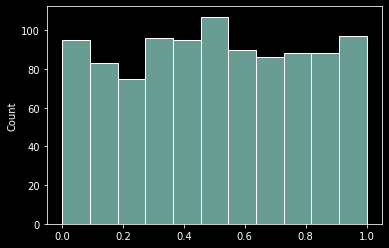

In [102]:
sns.histplot(result) 
# равномерное распределение p-value для выборок, у к-х нет разницы (конверсия=0.118)

In [115]:
(np.array(result) < alpha).mean()
# вероятность отвергнуть верную нулевую гипотизу

0.058

In [104]:
df = pd.DataFrame(np.random.normal(size=1000))

array([[<Axes: title={'center': '0'}>]], dtype=object)

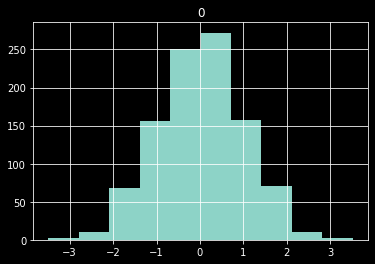

In [105]:
df.hist()

In [107]:
df = df.sort_values(0)

In [109]:
df['cnt'] = range(1, 1001)

In [110]:
df['pct'] = df['cnt'] / 1000

In [111]:
df

,0,cnt,pct
656,-3.489603,1,0.001
556,-2.869097,2,0.002
230,-2.694812,3,0.003
738,-2.658894,4,0.004
829,-2.466137,5,0.005
...,...,...,...
118,2.477685,996,0.996
786,2.522825,997,0.997
648,2.821462,998,0.998
115,2.849422,999,0.999


<Axes: >

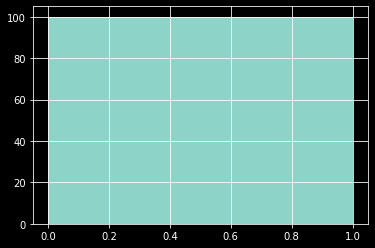

In [112]:
df['pct'].hist()

In [113]:
df['bin'] = pd.cut(df['pct'], 10)

In [114]:
df.groupby('bin')['pct'].count()

bin
(1e-06, 0.101]    100
(0.101, 0.201]    100
(0.201, 0.301]    100
(0.301, 0.401]    100
(0.401, 0.5]      100
(0.5, 0.6]        100
(0.6, 0.7]        100
(0.7, 0.8]        100
(0.8, 0.9]        100
(0.9, 1.0]        100
Name: pct, dtype: int64

Ошибка второго рода

In [116]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1, 0.10, size=700).mean()
  b = np.random.binomial(1, 0.12, size=300).mean()
  diff = abs(a - b)
  pval = np.mean([abs(np.random.binomial(1, 0.118, size=700).mean()
  - np.random.binomial(1, 0.118, size=300).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

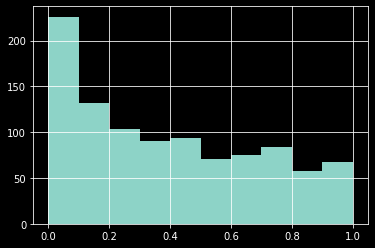

In [117]:
pd.Series(result).hist()

In [118]:
(pd.Series(result) < 0.05).mean() # мощность (power)

0.128

In [119]:
3 / 7

0.42857142857142855

In [123]:
# получить размеры выборок для заданной мощности
import statsmodels.stats.api as sms 
es = sms.proportion_effectsize(0.10, 0.12)
sms.NormalIndPower().solve_power(es, power=0.128, alpha=0.05, ratio=3/7)

535.0198436521202

In [124]:
535.0198436521202 * 3 / 7

229.29421870805155

In [127]:
n = 10000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1, 0.10, size=680)
  b = np.random.binomial(1, 0.15, size=680)
  _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [128]:
(pd.Series(result) < 0.05).mean()

0.8033